In [1]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pycountry

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pycountry-convert

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import pycountry_convert as pc
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter
from pathlib import Path

import scipy
from scipy.stats import kstest
from scipy.stats import shapiro
from scipy.stats import lognorm
from scipy.stats import ranksums
from scipy.stats import f_oneway
from scipy.stats import tmean
from scipy.stats import tstd

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [5]:
quantity_Data = pd.read_csv("quantity_Data.csv")
value_Data = pd.read_csv("value_Data.csv")
land_Data = pd.read_csv("land_Data.csv")     ## importing datasets

In [6]:
agriculture_Data = pd.concat([quantity_Data, value_Data], axis="rows")
agriculture_Data.to_csv("agriculture_Data.csv")
agriculture_Data.head()

,Unnamed: 0,Domain,Area,Element,Item,Year,Unit,Value,Flag Description,Country Code
0,192,Crops and livestock products,Croatia,Import Quantity,Cattle,2006,Head,162288,Official figure,HR
1,193,Crops and livestock products,Croatia,Import Quantity,Cattle,2007,Head,144750,Official figure,HR
2,194,Crops and livestock products,Croatia,Import Quantity,Cattle,2008,Head,155515,Official figure,HR
3,195,Crops and livestock products,Croatia,Import Quantity,Cattle,2009,Head,138672,Official figure,HR
4,196,Crops and livestock products,Croatia,Import Quantity,Cattle,2010,Head,140123,Official figure,HR


In [7]:
land_Data.head()

,Unnamed: 0,DATAFLOW,LAST UPDATE,freq,crops,animal,farmtype,so_eur,unit,agrarea,country,geo,TIME_PERIOD,OBS_VALUE
0,6,ESTAT:EF_LUS_MAIN(1.0),06/12/2022 11:00,A,UAA,Cattle,FT46_SO,TOTAL,HA,TOTAL,Denmark,DK,2020,110060
1,10,ESTAT:EF_LUS_MAIN(1.0),06/12/2022 11:00,A,UAA,Cattle,FT46_SO,TOTAL,HA,TOTAL,Finland,FI,2020,227860
2,12,ESTAT:EF_LUS_MAIN(1.0),06/12/2022 11:00,A,UAA,Cattle,FT46_SO,TOTAL,HA,TOTAL,Croatia,HR,2020,81570
3,14,ESTAT:EF_LUS_MAIN(1.0),06/12/2022 11:00,A,UAA,Cattle,FT46_SO,TOTAL,HA,TOTAL,Ireland,IE,2020,1999910
4,33,ESTAT:EF_LUS_MAIN(1.0),06/12/2022 11:00,A,UAA,Sheep,FT48_SO,TOTAL,HA,TOTAL,Denmark,DK,2020,27920


In [8]:
area_col = agriculture_Data.keys()[2]
ag_IE = agriculture_Data.loc[agriculture_Data[area_col] == 'Ireland']   ##extracting Ireland's data only 

agriculture_Data = agriculture_Data.iloc[:,5:]  ##dropping non-numeric columns before Years
ag_IE = ag_IE.iloc[:,5:]

In [9]:
agriculture_Data.columns

Index(['Year', 'Unit', 'Value', 'Flag Description', 'Country Code'], dtype='object')

In [10]:
agriculture_Data = agriculture_Data.drop(columns = ['Flag Description', 'Country Code']) ##dropping surplus columns
agriculture_Data.head()

,Year,Unit,Value
0,2006,Head,162288
1,2007,Head,144750
2,2008,Head,155515
3,2009,Head,138672
4,2010,Head,140123


In [11]:
ag_IE = ag_IE.drop(columns = ['Flag Description', 'Country Code'])
ag_IE.head()

,Year,Unit,Value
156,2006,Head,372
157,2007,Head,767
158,2008,Head,90
159,2009,Head,38
160,2010,Head,98


In [12]:
agriculture_Data.columns.is_unique  ##checking for duplicated column names

True

In [13]:
agriculture_Data.columns.duplicated()   ##testing the index for duplicate values

array([False, False, False])

In [14]:
agriculture_Data.loc[:, ~agriculture_Data.columns.duplicated()]  ##dropping duplicate index columns values

,Year,Unit,Value
0,2006,Head,162288
1,2007,Head,144750
2,2008,Head,155515
3,2009,Head,138672
4,2010,Head,140123
...,...,...,...
449,2017,1000 US$,3042
450,2018,1000 US$,2213
451,2019,1000 US$,1295
452,2020,1000 US$,3091


In [15]:
agriculture_Data.index.is_unique

False

In [16]:
agriculture_Data.index.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [17]:
agriculture_Data.loc[~agriculture_Data.index.duplicated(), :]  ##drop rows with duplicate index values

,Year,Unit,Value
0,2006,Head,162288
1,2007,Head,144750
2,2008,Head,155515
3,2009,Head,138672
4,2010,Head,140123
...,...,...,...
449,2017,1000 US$,3042
450,2018,1000 US$,2213
451,2019,1000 US$,1295
452,2020,1000 US$,3091


In [18]:
cor = agriculture_Data.corr()
cor

,Year,Value
Year,1.00000,0.22511
Value,0.22511,1.00000


<AxesSubplot:>

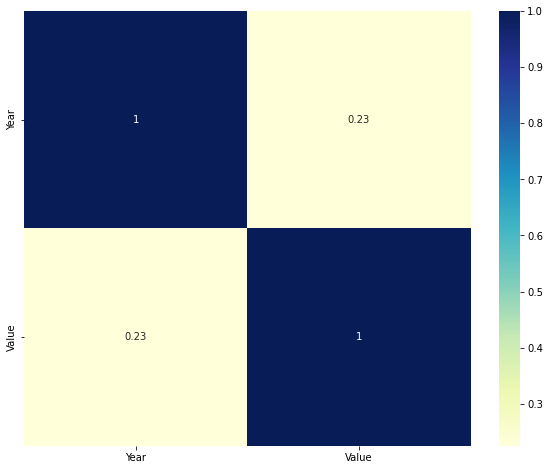

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(data = cor, annot = True, cmap="YlGnBu")  ##correlation heatmap

**Shapiro wilk test

In [20]:
import scipy.stats as stats

stats.shapiro(agriculture_Data.Value)   ##EU Value test

ShapiroResult(statistic=0.6755138635635376, pvalue=2.0062262595578152e-38)

In [21]:
import scipy.stats as stats

stats.shapiro(agriculture_Data.Year) 

ShapiroResult(statistic=0.9463774561882019, pvalue=1.2453088316700074e-17)

In [22]:
import scipy.stats as stats

stats.shapiro(ag_IE.Value)  ##Irish Value test

ShapiroResult(statistic=0.7366018295288086, pvalue=6.844200955719149e-20)

In [23]:
import scipy.stats as stats

stats.shapiro(ag_IE.Year)

ShapiroResult(statistic=0.9462703466415405, pvalue=4.353688254354893e-08)

**ONE-WAY ANOVA

In [24]:
formula = ols('Value~Year', data = agriculture_Data).fit()    ## ANOVA interaction
aov = sm.stats.anova_lm(formula, type=2)
print(aov)

             df        sum_sq       mean_sq          F        PR(>F)
Year        1.0  1.612059e+11  1.612059e+11  48.361915  6.782034e-12
Residual  906.0  3.019991e+12  3.333324e+09        NaN           NaN


In [25]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov)      ##generating an ANOVA table 

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
Year,1.612059e+11,1.0,1.612059e+11,48.361915,6.782034e-12,0.050675,0.049575
Residual,3.019991e+12,906.0,3.333324e+09,NaN,NaN,NaN,NaN


In [26]:
averageValue = agriculture_Data['Value'].mean()    ##performing descriptive statistics
print(averageValue)

averageYear = agriculture_Data['Year'].mean()
print(averageYear)

medianValue = agriculture_Data['Value'].median()
print(medianValue)

medianYear = agriculture_Data['Year'].median()
print(medianYear)

standard_deviationValue = agriculture_Data['Value'].std()    
print(standard_deviationValue)

standard_deviationYear = agriculture_Data['Year'].std()
print(standard_deviationYear)

36333.70484581498
2012.9603524229076
3879.0
2013.0
59223.1704673793
4.550170246184921


In [27]:
ag_IE.columns.is_unique

True

In [28]:
ag_IE.columns.duplicated()

array([False, False, False])

In [29]:
ag_IE.loc[~ag_IE.index.duplicated(), :]  ##drop rows with duplicate index values

,Year,Unit,Value
156,2006,Head,372
157,2007,Head,767
158,2008,Head,90
159,2009,Head,38
160,2010,Head,98
...,...,...,...
449,2017,1000 US$,3042
450,2018,1000 US$,2213
451,2019,1000 US$,1295
452,2020,1000 US$,3091


In [30]:
cor = ag_IE.corr()
cor

,Year,Value
Year,1.000000,0.079785
Value,0.079785,1.000000


<AxesSubplot:>

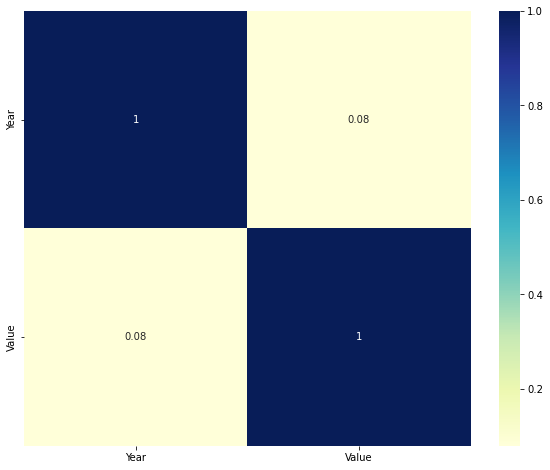

In [31]:
plt.figure(figsize=(10,8))
sns.heatmap(data = cor, annot = True, cmap="YlGnBu")  ##correlation heatmap

In [32]:
formula = ols('Value~Year', data = ag_IE).fit()    ## ANOVA interaction - IE
aov = sm.stats.anova_lm(formula, type=2)
print(aov)

             df        sum_sq       mean_sq         F    PR(>F)
Year        1.0  1.028662e+10  1.028662e+10  1.627213  0.203254
Residual  254.0  1.605691e+12  6.321616e+09       NaN       NaN


In [33]:
def anova_table_IE(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table_IE(aov)      ##generating the Irish ANOVA table

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
Year,1.028662e+10,1.0,1.028662e+10,1.627213,0.203254,0.006366,0.002444
Residual,1.605691e+12,254.0,6.321616e+09,NaN,NaN,NaN,NaN


In [34]:
from scipy.stats import levene      ## Homogeinity of variance: Levene's test
quantity_Data = pd.read_csv("quantity_Data.csv")

In [35]:
quantity_Data = quantity_Data.iloc[:,0:]  ##dropping first two columns from the dataset

In [36]:
quantity_Data = quantity_Data.drop(columns = ['Element', 'Item', 'Unit', 'Flag Description', 'Country Code'])  ##dropping further columns

In [37]:
quantity_Data['Area'].value_counts()

Croatia    128
Ireland    128
Denmark    110
Finland     88
Name: Area, dtype: int64

In [38]:
croatia = quantity_Data.Value[quantity_Data.Area == "Croatia"]

In [39]:
ireland = quantity_Data.Value[quantity_Data.Area == "Ireland"]

In [40]:
denmark = quantity_Data.Value[quantity_Data.Area == "Denmark"]

In [41]:
finland = quantity_Data.Value[quantity_Data.Area == "Finland"]

In [42]:
sd1 = croatia.std()
sd1

56605.358560599656

In [43]:
sd2 = ireland.std()
sd2

79762.86655325936

In [44]:
sd3 = denmark.std()
sd3

30155.12446886562

In [45]:
sd4 = finland.std()
sd4

807.158881933681

**T-Test

In [46]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from statsmodels.stats import weightstats

In [47]:
value_Data = pd.read_csv("value_Data.csv")

In [48]:
value_Data = value_Data.iloc[:,0:]  ##dropping first two columns from the dataset

In [49]:
value_Data = value_Data.drop(columns = ['Element', 'Item', 'Unit', 'Flag Description', 'Country Code'])  ##dropping further columns

In [50]:
X = value_Data['Value']; X

0      162288
1      144750
2      155515
3      138672
4      140123
        ...  
449      3042
450      2213
451      1295
452      3091
453      1822
Name: Value, Length: 454, dtype: int64

In [51]:
stats.ttest_1samp(X,30000)   ##reject H0, accept H1

Ttest_1sampResult(statistic=2.2774798832281187, pvalue=0.023222824674809982)

In [52]:
stats.t.sf(30000, 453)  ##H1 : u > 30000

0.0